## CONWAY'S GAME OF LIFE

Conway’s Game of Life is a zero-player game requiring only an initial state and no further input. It occurs on a grid of square cells, each in one of two possible states: live or dead. 
Every cell interacts with its neighbors (horizontally, vertically, or diagonally adjacent cells).
Starting at the initial state, the neighbors interact according to the following rules:
1. Any live cell with two or three live neighbors survives. Otherwise, a cell dies due to loneliness (with no or only one neighbor) or  overpopulation (with four or more neighbors).
2. Any dead cell with (exactly) three live neighbors becomes a live cell.
3. A dead cell with any other number of neighbors remains dead.

In [922]:
# importing the necessary modules.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [923]:
class GameOfLife(object):
    
    def __init__(self,x_dim,y_dim):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.life = np.zeros((x_dim,y_dim),dtype='int8') # Setting up the grid.

    def get_grid(self):
        return self.life

    def print_grid(self):
        # creating a method to print the grid row by row
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                if j < self.y_dim:
                    print(self.life[i][j], end = '\033[34m | \033[0m') # setting the separator color to blue using ANSI Escape method
            print()
            print()

    def populate_grid(self,coord):
        # Here the coord variable is a tuple. The initial state of the grid is set up by replacing the specific coordinates with ones
        self.coord = coord
        for i in range(len(self.coord)):
            # The code below ensures that the tuple does not go beyond the shape of the grid
            if (self.coord[i][0] < self.x_dim) and (self.coord[i][1] < self.y_dim): 
                self.life[self.coord[i][0],self.coord[i][1]] = 1
            else:
                continue
        
        return self.life

    def make_step(self):
        ''''This method makes changes to the grid based on conway's rule. Working with a copy ensures that an update of a cell does not interfere
        with the calculations of other cells.'''
        self.new_grid = self.life.copy()
        
        for row in range(self.x_dim):
            for col in range(self.y_dim):
                total = 0 # setting the initial number of  active neighbours for each cell.
                for n_row in [-1,0,1]:
                    for n_col in [-1,0,1]:
                        if n_row == n_col == 0:
                            continue

                        # The if condition prevents the error of trying to sum a cell beyond the shape of the grid.
                        if 0 <= (row+n_row) < self.x_dim and 0 <=(col+n_col) < self.y_dim:
                            total += self.life[row+n_row][col+n_col] # This gives the total no of active cells in a cell's neighbourhood.

                
                # print(total, end=' ') Uncomment to check the number of active cells for each cell.

                # Below are Conway's game of life rules.
                if self.life[row][col] == 1 and (total < 2 or total > 3): # checks for underpopulation or overpopulation of each cell.
                    self.new_grid[row][col] = 0
                    
                elif self.life[row][col] == 0 and total == 3: 
                    self.new_grid[row][col] = 1

        self.life = self.new_grid # setting the changes to the original grid
        return self.life

    def make_steps(self,n):

        '''Here changes to the grid are made n times. The code below is same as above, the only difference is that a while loop and a variable self.step
        have been added to ensure the code runs n times'''
        self.steps = 1
        while self.steps <= n:
            self.new_grid = self.life.copy()
            for row in range(self.x_dim):
                for col in range(self.y_dim):
                    total = 0
                    for n_row in [-1,0,1]:
                        for n_col in [-1,0,1]:
                            if n_row == n_col == 0:
                                continue

                            if 0 <= (row+n_row) < self.x_dim and 0 <=(col+n_col) < self.y_dim:
                                total += self.life[row+n_row][col+n_col]

                    if self.life[row][col] == 1 and (total < 2 or total > 3):
                        self.new_grid[row][col] = 0
                        
                    elif self.life[row][col] == 0 and total == 3:
                        self.new_grid[row][col] = 1

            self.life = self.new_grid   
            self.steps += 1 
        return self.life

    def draw_grid(self):
        n_rows, n_cols = self.life.shape
        fig, ax = plt.subplots(figsize=(n_cols, n_rows)) # breaking down the grid to smaller grids.
        fig.patch.set_facecolor("black")  # Sets background color
    
        for row in range(n_rows):
            for col in range(n_cols):
                # Using a thematic color scheme
                color = "white" if self.life[row, col] == 0 else "blue"  # blue for alive cell, white for dead cell
                rect = plt.Rectangle((col, row), 1, 1, facecolor=color, edgecolor="gray")
                ax.add_patch(rect)
                # Annotating with text for easy readability
                text = "0" if self.life[row, col] == 0 else "1"
                ax.text(col + 0.5, row + 0.5, text, color="black", ha="center", va="center", fontsize=14)

        # note that x_axis is equivalent to columns and y_axis is equivalent to rows. Do not be confused.
        ax.set_xlim(0, n_cols)
        ax.set_ylim(0, n_rows)
        ax.set_xticks(np.arange(n_cols + 1))
        ax.set_yticks(np.arange(n_rows + 1))
        #ax.grid(color="gray", linestyle="--", linewidth=0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        # Getting the axis in the right order
        ax.invert_yaxis()
        ax.set_title("Conway's Game of Life", fontsize=16, fontweight="bold", color = 'white')
        plt.show()

In [924]:
move = GameOfLife(5,5)

In [925]:
move.get_grid()

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [926]:
set_change = ((0,1),(1,0),(0,4),(4,0),(1,3),(2,2),(2,4),(3,0),(3,3),(4,0),(4,2))
move.populate_grid(set_change)

array([[0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0]], dtype=int8)

In [927]:
move.print_grid()

0 | 1 | 0 | 0 | 1 | 

1 | 0 | 0 | 1 | 0 | 

0 | 0 | 1 | 0 | 1 | 

1 | 0 | 0 | 1 | 0 | 

1 | 0 | 1 | 0 | 0 | 



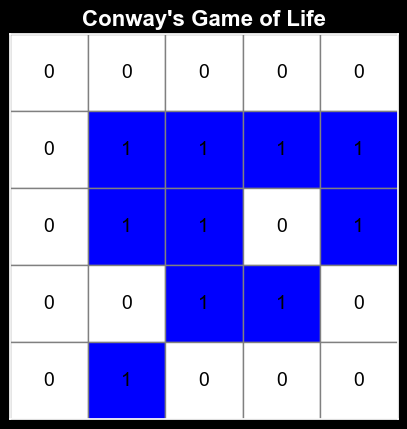

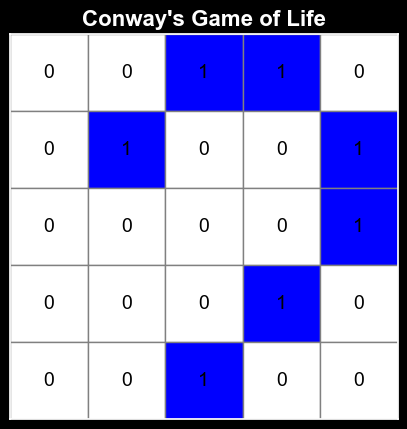

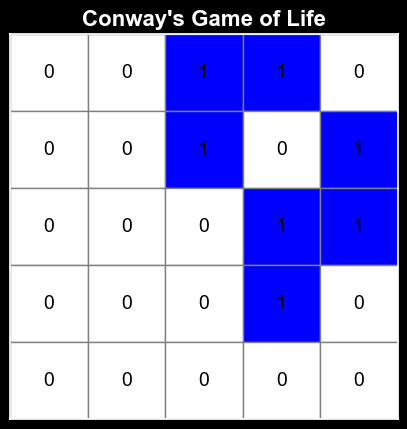

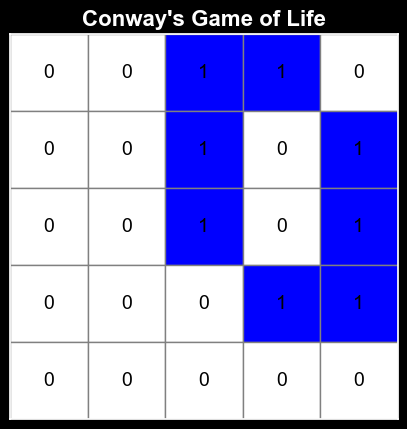

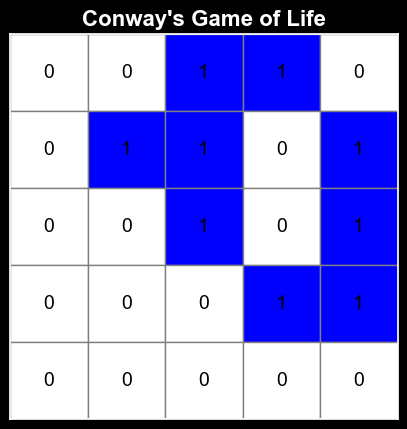

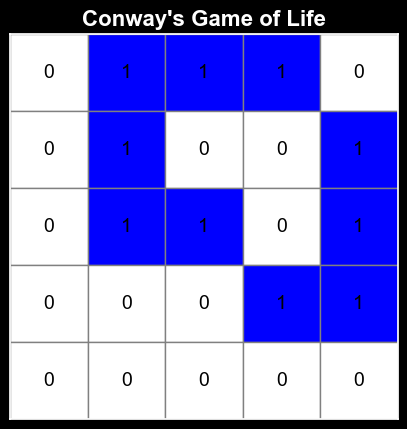

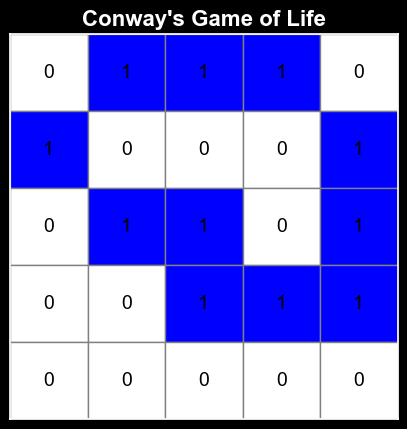

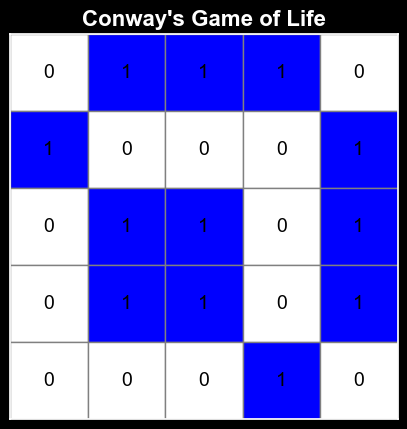

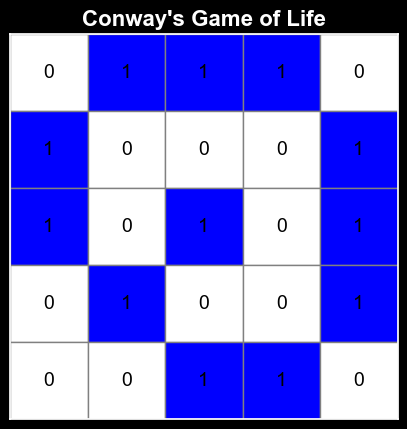

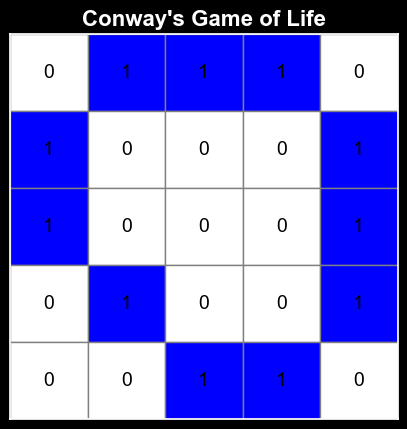

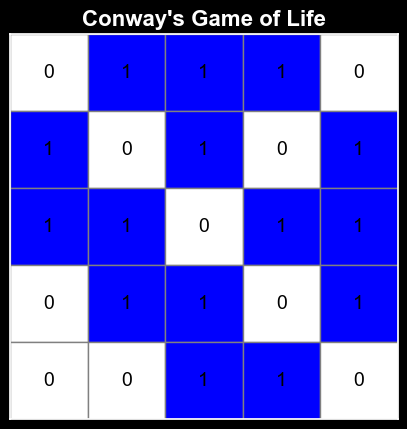

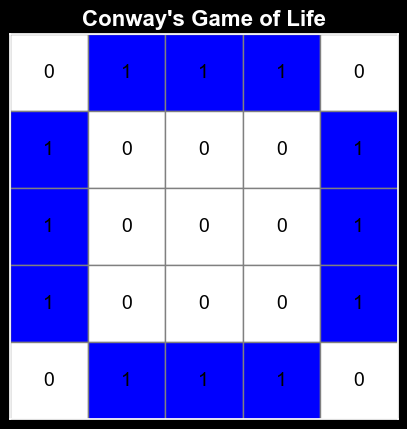

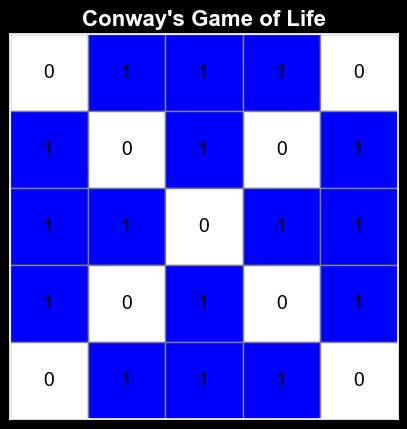

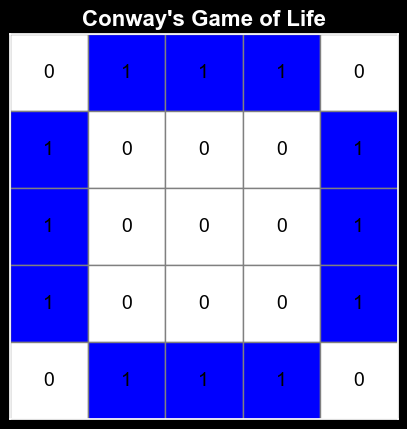

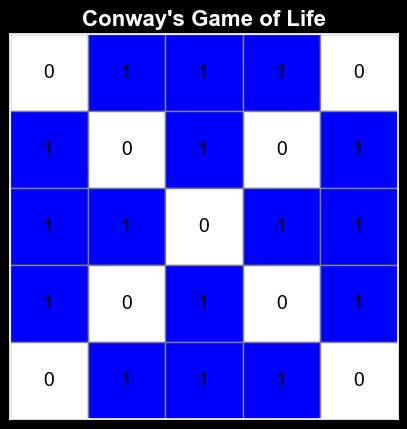

In [928]:
for i in range(15):
    move.make_step()
    move.draw_grid()
# After 11 iterations, the grid starts oscillating between two states

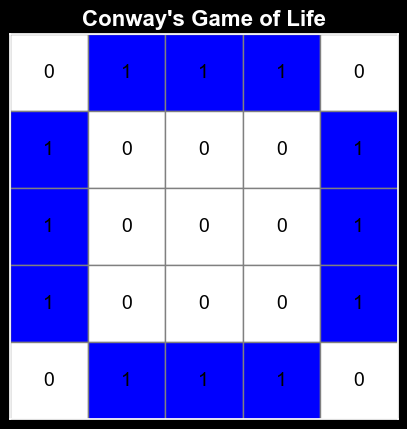

In [929]:
move.make_steps(5)
move.draw_grid()
# No added amount of iterations changes the grid.